<a href="https://colab.research.google.com/github/danielsitepu36/ML-Flowers-CNN/blob/main/Tugas_ML_CNN_AdhitDanielRian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Convolutional Neural Network

Alexius Adhitya K            - 18/424179/PA/18284\
Daniel Suranta Sitepu       - 18/424185/PA/18290\
Fransiskus Rian Wardana P   - 18/427592/PA/18552

###Import Libraries

In [12]:
from google.colab import drive
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from PIL import Image
from random import shuffle
from shutil import copy
from tensorflow.keras.optimizers import RMSprop

import keras_preprocessing
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import os
import tensorflow as tf
import zipfile

###Download Dataset

In [13]:
!pip install --upgrade gdown
!gdown --id 1SnrB4fYgQ_J2QTjCQZ2lEsQZNqPLX6TD -O flowers.zip
!ls -lh

Requirement already up-to-date: gdown in /usr/local/lib/python3.7/dist-packages (3.13.0)
Downloading...
From: https://drive.google.com/uc?id=1SnrB4fYgQ_J2QTjCQZ2lEsQZNqPLX6TD
To: /content/flowers.zip
472MB [00:01, 251MB/s]
total 450M
-rw-r--r-- 1 root root 450M Jun  5 08:36 flowers.zip
drwxr-xr-x 1 root root 4.0K Jun  1 13:40 sample_data


###Load and Process Images

In [14]:
FILE_PATH = '/content/flowers.zip'
EXTRACTED_PATH = '/tmp/flowers/'
PROCESSED_PATH = '/tmp/processed/'
FINAL_PATH = '/tmp/final/'
CLASSES = ['rose', 'sunflower', 'dandelion']

## Extracting zip file to '/tmp/flowers'
zip_ref = zipfile.ZipFile(FILE_PATH, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# View folder structure
!apt install tree -y
!tree -d -L 2 /tmp/flowers/

img_folders = os.listdir(EXTRACTED_PATH)
USED_CLASSES = [x for x in img_folders if x in CLASSES]

# Resizing images
ROSE_DATA = []
SUNFLOWER_DATA = []
DANDELION_DATA = []

def loadData(grayscale=True):
    for folder in USED_CLASSES:
        img_files = os.listdir(EXTRACTED_PATH + folder)
        number = 0
        for item in img_files:
            if item.endswith(".jpg") and number < 100:
                os.makedirs(os.path.dirname(PROCESSED_PATH + folder + '/'), exist_ok=True)
                img = Image.open(EXTRACTED_PATH + folder + '/' + item)
                new_img = img.resize((320, 240))
                if grayscale:
                  new_img = new_img.convert('L')
                new_img.save(PROCESSED_PATH + folder + '/' + item)
                if folder == 'rose':
                    ROSE_DATA.append((item, folder))
                if folder == 'sunflower':
                    SUNFLOWER_DATA.append((item, folder))
                if folder == 'dandelion':
                    DANDELION_DATA.append((item, folder))
                number+=1
loadData(True)

shuffle(ROSE_DATA)
shuffle(SUNFLOWER_DATA)
shuffle(DANDELION_DATA)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/tmp/flowers/
├── daisy
├── dandelion
├── flowers
│   ├── daisy
│   ├── dandelion
│   ├── rose
│   ├── sunflower
│   └── tulip
├── rose
├── sunflower
└── tulip

11 directories


###View Processed Images

In [15]:
def displayImages(images, final=False, cols=5):
  #Display given images and their labels in a grid
  rows = int(math.ceil(len(images) / cols))
  fig = plt.figure()
  fig.set_size_inches(cols * 3, rows * 3)
  result = []

  if final:
      folder = FINAL_PATH
  else:
      folder = PROCESSED_PATH
  
  subdirs = os.listdir(folder)
  print(subdirs)

  for subdir in subdirs:
      # examples of RESIZED_PATH:
      # /tmp/resized/{dandelion,rose,sunflower}/gambar
      # /tmp/final/{test_data,train_data}/gambar
      dir_items = os.listdir(folder + subdir)
      for img in images:
          if img[0] in dir_items:
            result.append((Image.open(folder + subdir + '/' + img[0]), img[1]))
  
  #images = [(Image.open(folder + images[x][1] + '/' + images[x][0]), images[x][1]) for x in range(len(images))]
  print(len(result))
  
  for i, (image, image_class) in enumerate(result):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    plt.title(image_class)
    plt.imshow(image, cmap=cm.gray, vmin=0, vmax=255)
    # if final:
    #     plt.imshow(image, cmap=cm.gray, vmin=0, vmax=255)
    # else:
    #     plt.imshow(image)

['sunflower', 'dandelion', 'rose']
5
['sunflower', 'dandelion', 'rose']
5


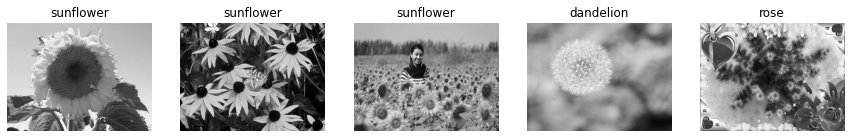

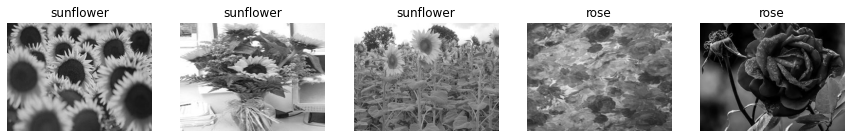

In [16]:
TRAIN_DATA = ROSE_DATA[:80] + SUNFLOWER_DATA[:80] + DANDELION_DATA[:80]
TEST_DATA = ROSE_DATA[80:] + SUNFLOWER_DATA[80:] + DANDELION_DATA[80:]
shuffle(TRAIN_DATA)
shuffle(TEST_DATA)
displayImages(TRAIN_DATA[:5], False)
displayImages(TEST_DATA[:5], False)

###Collect Train and Test Images into Folders

In [17]:
train_rose_dir = '/tmp/final/train/rose/'
os.makedirs(os.path.dirname(train_rose_dir), exist_ok=True)
train_sunflower_dir = '/tmp/final/train/sunflower/'
os.makedirs(os.path.dirname(train_sunflower_dir), exist_ok=True)
train_dandelion_dir = '/tmp/final/train/dandelion/'
os.makedirs(os.path.dirname(train_dandelion_dir), exist_ok=True)

test_rose_dir = '/tmp/final/test/rose/'
os.makedirs(os.path.dirname(test_rose_dir), exist_ok=True)
test_sunflower_dir = '/tmp/final/test/sunflower/'
os.makedirs(os.path.dirname(test_sunflower_dir), exist_ok=True)
test_dandelion_dir = '/tmp/final/test/dandelion/'
os.makedirs(os.path.dirname(test_dandelion_dir), exist_ok=True)

for item, folder in TRAIN_DATA:
    if folder == 'rose':
        old_path=os.path.join(PROCESSED_PATH, folder, item)
        new_path=os.path.join(train_rose_dir, item)
        copy(old_path, new_path)
    if folder == 'sunflower':
        old_path=os.path.join(PROCESSED_PATH, folder, item)
        new_path=os.path.join(train_sunflower_dir, item)
        copy(old_path, new_path)
    if folder == 'dandelion':
        old_path=os.path.join(PROCESSED_PATH, folder, item)
        new_path=os.path.join(train_dandelion_dir, item)
        copy(old_path, new_path)

for item, folder in TEST_DATA:
    if folder == 'rose':
        old_path=os.path.join(PROCESSED_PATH, folder, item)
        new_path=os.path.join(test_rose_dir, item)
        copy(old_path, new_path)
    if folder == 'sunflower':
        old_path=os.path.join(PROCESSED_PATH, folder, item)
        new_path=os.path.join(test_sunflower_dir, item)
        copy(old_path, new_path)
    if folder == 'dandelion':
        old_path=os.path.join(PROCESSED_PATH, folder, item)
        new_path=os.path.join(test_dandelion_dir, item)
        copy(old_path, new_path)

###Augmenting Images

In [18]:
TRAINING_DIR = "/tmp/final/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
      )

VALIDATION_DIR = "/tmp/final/test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

# train_generator = np.expand_dims(train_generator, axis=3)
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(240, 320),
	class_mode='categorical',
  # color_mode='grayscale',
  batch_size=80
)

# validation_generator = np.expand_dims(validation_generator, axis=3)
validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(240, 320),
	class_mode='categorical',
  # color_mode='grayscale',
  batch_size=30
)

Found 287 images belonging to 3 classes.
Found 107 images belonging to 3 classes.


###Build the CNN Model

In [19]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(240, 320, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # # The third convolution
    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 238, 318, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 119, 159, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 117, 157, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 58, 78, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 76, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 28, 38, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 136192)           

###Train the CNN Model (Learning Rate 0.1)

In [20]:
model.compile(loss = 'categorical_crossentropy', optimizer=RMSprop(learning_rate=0.1), metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=50,
                    steps_per_epoch=3,
                    validation_data = validation_generator,
                    verbose = 1,
                    validation_steps=2,
                    )

# model.save("rps.h5")

Epoch 1/50
3/3 [==============================] - 6s 1s/step - loss: 875471040.0000 - accuracy: 0.3140 - val_loss: 15135188.0000 - val_accuracy: 0.4167
Epoch 2/50
3/3 [==============================] - 3s 1s/step - loss: 12752944.0000 - accuracy: 0.3623 - val_loss: 623966.6875 - val_accuracy: 0.3500
Epoch 3/50
3/3 [==============================] - 3s 1s/step - loss: 758782.2500 - accuracy: 0.3285 - val_loss: 6157.7021 - val_accuracy: 0.3833
Epoch 4/50
3/3 [==============================] - 3s 1s/step - loss: 47992.6406 - accuracy: 0.3816 - val_loss: 6872.5801 - val_accuracy: 0.3167
Epoch 5/50
3/3 [==============================] - 3s 1s/step - loss: 17424.0195 - accuracy: 0.2947 - val_loss: 7943.2393 - val_accuracy: 0.3667
Epoch 6/50
3/3 [==============================] - 4s 1s/step - loss: 8933.2832 - accuracy: 0.3042 - val_loss: 5034.5029 - val_accuracy: 0.2833
Epoch 7/50
3/3 [==============================] - 3s 1s/step - loss: 2783.8125 - accuracy: 0.3913 - val_loss: 793.9539 - va

### CNN Model with Learning Rate 0.1 Accuracy Graph

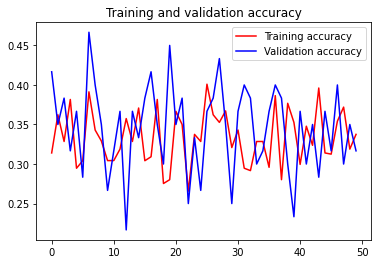

<Figure size 432x288 with 0 Axes>

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

###Train the CNN Model (Learning Rate 0.8)

In [22]:
model.compile(loss = 'categorical_crossentropy', optimizer=RMSprop(learning_rate=0.8), metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=50,
                    steps_per_epoch=3,
                    validation_data = validation_generator,
                    verbose = 1,
                    validation_steps=2,
                    )

# model.save("rps.h5")

Epoch 1/50
3/3 [==============================] - 5s 1s/step - loss: 65.4166 - accuracy: 0.3417 - val_loss: 83983120.0000 - val_accuracy: 0.3833
Epoch 2/50
3/3 [==============================] - 3s 1s/step - loss: 97686757376.0000 - accuracy: 0.3527 - val_loss: 6308106752.0000 - val_accuracy: 0.4000
Epoch 3/50
3/3 [==============================] - 4s 1s/step - loss: 74395926528.0000 - accuracy: 0.3542 - val_loss: 5795222528.0000 - val_accuracy: 0.3500
Epoch 4/50
3/3 [==============================] - 4s 1s/step - loss: 1972462336.0000 - accuracy: 0.3542 - val_loss: 598313792.0000 - val_accuracy: 0.3167
Epoch 5/50
3/3 [==============================] - 3s 1s/step - loss: 144316800.0000 - accuracy: 0.3140 - val_loss: 14044015.0000 - val_accuracy: 0.3333
Epoch 6/50
3/3 [==============================] - 3s 1s/step - loss: 6101007.0000 - accuracy: 0.3140 - val_loss: 204245.8281 - val_accuracy: 0.3167
Epoch 7/50
3/3 [==============================] - 3s 1s/step - loss: 80098.5547 - accurac

### CNN Model with Learning Rate 0.8 Accuracy Graph

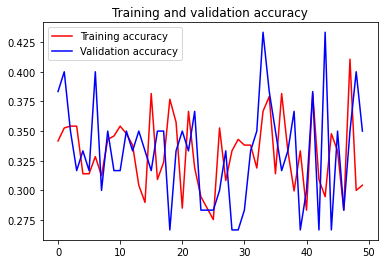

<Figure size 432x288 with 0 Axes>

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()